# Final Project Submission

* Student name: James M. Irving
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: Life
* Blog post URL: TBD

# OBTAIN

- There are 11 different csv files provided in the zippedData folder. 
- Using these files is optional. 




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, glob

In [2]:
files = glob.glob('zippedData/*.csv*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [3]:
file = files[0]
file

'zippedData/imdb.title.crew.csv.gz'

In [4]:
## Get variable-friendly table name
file.replace('.csv.gz','').split('/')[-1].replace('.','_')

'imdb_title_crew'

In [5]:
## Load all files into a dict using their filename as key
tables = {}
for file in files:
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    tables[table_name] = pd.read_csv(file)

In [6]:
dash='---'
for name,df in tables.items():
    print(dash*30)
    print(f"Preview of {name}:")
    display(df.head(3))
    print('\n\n')

------------------------------------------------------------------------------------------
Preview of imdb_title_crew:


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585





------------------------------------------------------------------------------------------
Preview of tmdb_movies:


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368





------------------------------------------------------------------------------------------
Preview of imdb_title_akas:


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0





------------------------------------------------------------------------------------------
Preview of imdb_title_ratings:


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20





------------------------------------------------------------------------------------------
Preview of imdb_name_basics:


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"





------------------------------------------------------------------------------------------
Preview of imdb_title_basics:


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama





------------------------------------------------------------------------------------------
Preview of tn_movie_budgets:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"





------------------------------------------------------------------------------------------
Preview of bom_movie_gross:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010





------------------------------------------------------------------------------------------
Preview of imdb_title_principals:


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN


### Approaches to consider:

- Using the provided csv's and merging dataframes with:
    - regular pandas
    - pandasql
- Using the provided csv's and creating a your own SQL database(using sqlite3)
- Sourcing your own dataset using Web Scraping.
- Sourcing your own dataset using an API

- Using 1 of the provided csv's and supplemnting it with additional data from an API

### Using the Provided Data - Join with Pandas

>#### Questions to consider:
>1. Where is the financial data?
>2. What columns are primary keys/unique indices?
>3. What tables could I join on what columns?

In [7]:
tables['tn_movie_budgets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
tables['bom_movie_gross'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


- Since bom_movie_gross has the financial data, that will be our first table

In [9]:
## Starting with BOM Movie Gross
df = tables['bom_movie_gross'].copy()
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
## why no domestic gross?
df[df['domestic_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


In [11]:
## Dropping Movies without domestic gross
df = df.dropna(subset=['domestic_gross'])
df.isna().sum()

title                0
studio               3
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [12]:
## why not foregin_gross?
df[df['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [13]:
#Filling foreign_gross with 0's
df['foreign_gross'] = df['foreign_gross'].fillna(0.0)
df.isna().sum()

title             0
studio            3
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
## why not studio?
df[df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
1862,Plot for Peace,NaN,7100.0,0,2014


In [15]:
df = df.dropna(subset=['studio'])
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [17]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3351 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [18]:
## Make a folder for the clean data
FOLDER = './cleaned_data/'
os.makedirs(FOLDER, exist_ok=True)
df.to_csv(f'{FOLDER}bom_movie_gross_cleaned.csv',index=False)

In [19]:
bom_gross = pd.read_csv('cleaned_data/bom_movie_gross_cleaned.csv')
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3351,The Quake,Magn.,6200.0,0.0,2018
3352,Edward II (2018 re-release),FM,4800.0,0.0,2018
3353,El Pacto,Sony,2500.0,0.0,2018
3354,The Swan,Synergetic,2400.0,0.0,2018


- What questions do I want to answer, and which tables would I need to do so?
    - Explore imdb.title.basics

### Table2

In [20]:
df = tables['imdb_title_basics'].copy()
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
## Why no genres?
df[df['genres'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN
35,tt0306058,Second Coming,Second Coming,2012,95.0,NaN
40,tt0326592,The Overnight,The Overnight,2010,88.0,NaN
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN
...,...,...,...,...,...,...
146088,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,NaN
146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,NaN
146107,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,NaN
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN


In [24]:
df = df.dropna(subset=['genres'])
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [25]:
df[df['runtime_minutes'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
26,tt0263814,On kadin,On kadin,2019,NaN,Drama
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [26]:
df = df[~df['runtime_minutes'].isna()]
df.isna().sum()

tconst             0
primary_title      0
original_title     1
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [27]:
df = df[~df['original_title'].isna()]
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [28]:
## Getting all genres as a list
genre_string = ','.join(df['genres'])
genre_string[:100]

'Action,Crime,Drama,Biography,Drama,Drama,Comedy,Drama,Fantasy,Comedy,Adventure,Animation,Comedy,Biog'

In [29]:
genre_list = list(set(genre_string.split(',')))
sorted(genre_list)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [30]:
for genre in genre_list:
    df[genre] = df['genres'].map(lambda x: genre in x).astype(int)
    

In [31]:
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Horror,Thriller,Western,Talk-Show,...,Romance,Short,History,Action,Sci-Fi,Sport,Documentary,Fantasy,Musical,War
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# cols = ['tconst','primary_title','original_title',*genre_list]
# df#[cols]

In [33]:
df.to_csv(f"{FOLDER}imdb_title_basics_clean.csv",index=False)

## Merging Data

In [34]:
bom_gross = pd.read_csv('cleaned_data/bom_movie_gross_cleaned.csv')
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3351,The Quake,Magn.,6200.0,0.0,2018
3352,Edward II (2018 re-release),FM,4800.0,0.0,2018
3353,El Pacto,Sony,2500.0,0.0,2018
3354,The Swan,Synergetic,2400.0,0.0,2018


In [35]:
imdb_basics = pd.read_csv('cleaned_data/imdb_title_basics_clean.csv')
imdb_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Horror,Thriller,Western,Talk-Show,...,Romance,Short,History,Action,Sci-Fi,Sport,Documentary,Fantasy,Musical,War
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
112228,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
112230,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df = pd.merge(bom_gross,imdb_basics,left_on = 'title',right_on='primary_title')
df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,...,Romance,Short,History,Action,Sci-Fi,Sport,Documentary,Fantasy,Musical,War
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,...,0,0,0,0,0,0,0,0,0,0
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,...,0,0,0,1,1,0,0,0,0,0
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,...,0,0,0,0,0,0,0,0,0,0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,...,0,0,0,0,0,0,0,1,0,0
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,Souvenir,Strand,11400.0,0.0,2018,tt2389092,Souvenir,Souvenir,2014,86.0,...,1,0,0,0,0,0,0,0,0,0
3157,Souvenir,Strand,11400.0,0.0,2018,tt3478898,Souvenir,Souvenir,2014,86.0,...,0,0,0,0,0,0,1,0,0,0
3158,Beauty and the Dogs,Osci.,8900.0,0.0,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,...,0,0,0,0,0,0,0,0,0,0
3159,The Quake,Magn.,6200.0,0.0,2018,tt6523720,The Quake,Skjelvet,2018,106.0,...,0,0,0,1,0,0,0,0,0,0


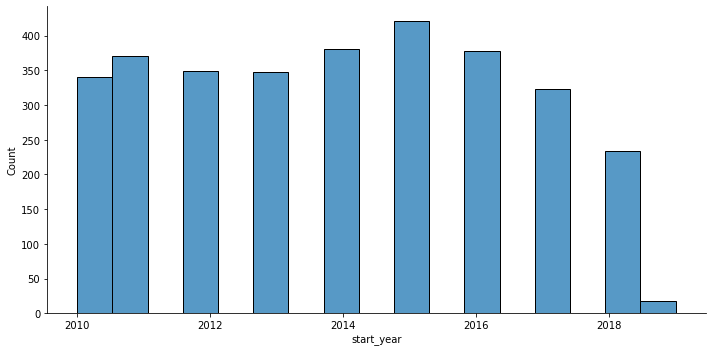

In [37]:
## Plot histogram of years
sns.displot(df, x='start_year',aspect=2)

In [41]:
plot_df = df.drop(columns=genre_list).copy()
plot_df['genre_list'] = plot_df['genres'].map(lambda x: x.split(','))
# plot_df = plot_df.explode('genre_list')
plot_df = plot_df.explode('genre_list')
plot_df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Adventure
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Animation
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Comedy
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Beauty and the Dogs,Osci.,8900.0,0.0,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",Thriller
3159,The Quake,Magn.,6200.0,0.0,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",Action
3159,The Quake,Magn.,6200.0,0.0,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",Drama
3159,The Quake,Magn.,6200.0,0.0,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",Thriller


In [51]:
order_median = list(plot_df.groupby('genre_list').median()['domestic_gross'].sort_values(ascending=False).index)
order_median

['Sci-Fi',
 'Adventure',
 'Animation',
 'Family',
 'Action',
 'Fantasy',
 'Horror',
 'Sport',
 'Comedy',
 'Thriller',
 'Mystery',
 'Crime',
 'Music',
 'Biography',
 'Western',
 'History',
 'Romance',
 'Drama',
 'Musical',
 'Documentary',
 'War',
 'News']

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Domestic Gross ($USD)')]

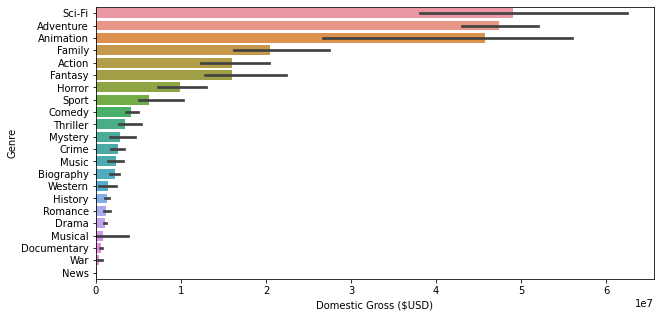

In [61]:
## Question? Which genres earn the most revenue?
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_df, y='genre_list',x='domestic_gross',
            estimator=np.median,ci=68,order=order_median,ax=ax)

ax.set(ylabel="Genre",xlabel="Domestic Gross ($USD)")

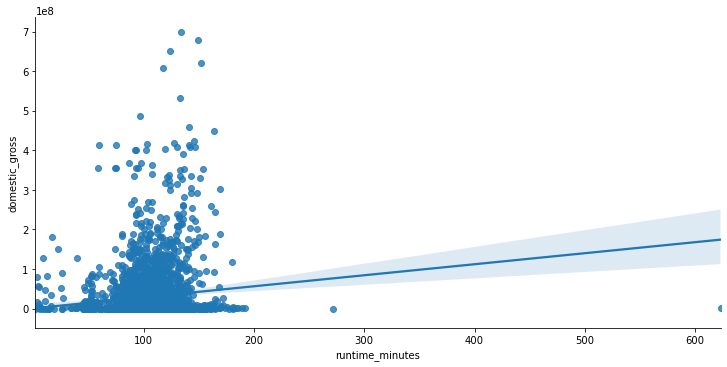

In [64]:
sns.lmplot(data=df,x='runtime_minutes',y='domestic_gross',aspect=2)

### Using the Provided Data - SQLite Database

In [27]:
with open('movie_db.sqlite','w') as f:
    f

In [28]:
# for name, table in tables:
    

In [34]:
import sqlite3
conn = sqlite3.connect('movie_db.sqlite')
cur = conn.cursor()

In [40]:
cur.execute("""SELECT * from sqlite_master where type='table'""").fetchall()

[]

In [41]:
name ='imdb_title_basics'
table = tables[name]
table

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [42]:
# cur.execute(f"CREATE TABLE IF NOT EXISTS {name}")